In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
train_df = pd.read_csv('../data/train.csv', index_col='PassengerId')
test_data = pd.read_csv('../data/test.csv', index_col='PassengerId')

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [6]:
train_df.isna().sum()/(train_df.index[-1])*100


Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [7]:
test_data.isna().sum()/(test_data.index[-1])*100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          6.569901
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       24.980901
Embarked     0.000000
dtype: float64

In [9]:
train_df.Cabin

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
train_df.drop(columns='Cabin', inplace=True)

In [8]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [9]:
train_df.dropna(subset=['Embarked'], inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df['Embarked_n'] = encoder.fit_transform(train_df['Embarked']) 

<AxesSubplot:>

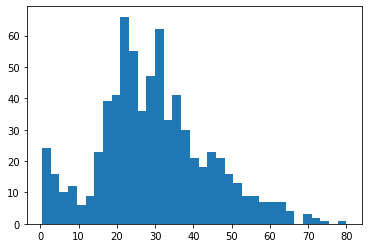

In [11]:
train_df['Age'].hist(bins=35, grid=False)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

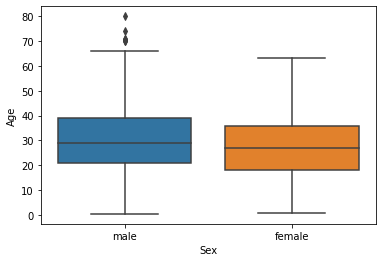

In [12]:
import seaborn as sns

sns.boxplot(x=train_df['Sex'], y=train_df['Age'])

In [13]:
pd.pivot_table(train_df, index=['Sex'], values=['Age'], aggfunc='mean')

,Age
Sex,
female,27.745174
male,30.726645


In [14]:
pd.pivot_table(train_df, index= ['Sex'], values=['Survived'], aggfunc='mean')

,Survived
Sex,
female,0.740385
male,0.188908


In [15]:
train_df.loc[train_df['Sex']=='male','Age']


PassengerId
1      22.0
5      35.0
6       NaN
7      54.0
8       2.0
       ... 
884    28.0
885    25.0
887    27.0
890    26.0
891    32.0
Name: Age, Length: 577, dtype: float64

In [16]:
train_df['Survived'].mean()

0.38245219347581555

In [17]:
train_df['Sex']

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 889, dtype: object

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Name        889 non-null    object 
 3   Sex         889 non-null    object 
 4   Age         712 non-null    float64
 5   SibSp       889 non-null    int64  
 6   Parch       889 non-null    int64  
 7   Ticket      889 non-null    object 
 8   Fare        889 non-null    float64
 9   Embarked    889 non-null    object 
 10  Embarked_n  889 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


In [19]:
encoder = LabelEncoder()
train_df['Sex_n'] = encoder.fit_transform(train_df['Sex'])

In [20]:
train_df.drop(columns='Name', inplace=True)

In [21]:
pd.set_option('display.max_rows', None)
train_df.loc[:,'Ticket']

PassengerId
1               A/5 21171
2                PC 17599
3        STON/O2. 3101282
4                  113803
5                  373450
6                  330877
7                   17463
8                  349909
9                  347742
10                 237736
11                PP 9549
12                 113783
13              A/5. 2151
14                 347082
15                 350406
16                 248706
17                 382652
18                 244373
19                 345763
20                   2649
21                 239865
22                 248698
23                 330923
24                 113788
25                 349909
26                 347077
27                   2631
28                  19950
29                 330959
30                 349216
31               PC 17601
32               PC 17569
33                 335677
34             C.A. 24579
35               PC 17604
36                 113789
37                   2677
38             A./5. 2152


In [22]:
train_df.loc[train_df['Ticket'].str.startswith('CA.'), 'Ticket']

PassengerId
160    CA. 2343
181    CA. 2343
202    CA. 2343
325    CA. 2343
650    CA. 2314
793    CA. 2343
847    CA. 2343
864    CA. 2343
Name: Ticket, dtype: object

In [23]:
model_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_n', 'Sex_n']
train_df = train_df[model_features]

In [24]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

NUMERICAL_COLUMNS = ['Age', 'Fare',]

train_df.loc[:, 'Age'] = scaler.fit_transform(train_df['Age'])
train_df.loc[:, 'Fare'] = scaler.fit_transform(train_df['Fare'])

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_n,Sex_n
PassengerId,,,,,,,,
1,0,3,22.00,1,0,7.2500,2,1
2,1,1,38.00,1,0,71.2833,0,0
3,1,3,26.00,0,0,7.9250,2,0
4,1,1,35.00,1,0,53.1000,2,0
5,0,3,35.00,0,0,8.0500,2,1
6,0,3,NaN,0,0,8.4583,1,1
7,0,1,54.00,0,0,51.8625,2,1
8,0,3,2.00,3,1,21.0750,2,1
9,1,3,27.00,0,2,11.1333,2,0


In [25]:
train_df.to_csv("../data/train_processed.csv")